In [1]:
pip install ipykernel nbconvert pint open-atmos-jupyter-utils scipy

Note: you may need to restart the kernel to use updated packages.


In [50]:
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
import pint
from scipy import constants as const
from open_atmos_jupyter_utils import show_plot

In [4]:
si = pint.UnitRegistry()

In [13]:
result_m = (100*si.nm + 100*si.km) / (100*si.s**2)
print(result_m.to_base_units())
print(result_m.to(si.km / si.ps**2))

1000.000000001 meter / second ** 2
1.000000000001e-24 kilometer / picosecond ** 2


In [34]:
def rho(p, T, Rd):
    return p / (Rd*T)

In [33]:
R = 8.314 * si.J / (si.kg * si.K)
massMolarDryAir = 28.966 * si.kg / si.kmol

Rd = (const.R / massMolarDryAir) * (si.J / si.K / si.mol)

print(Rd.to_base_units() * si.J / (si.kg * si.K))
print(R/massMolarDryAir.to_base_units())

rhoAir = rho(1013 * si.hPa, 296 * si.K, Rd)
print(rhoAir.to_base_units())

287.0421396810053 joule * meter ** 2 / kelvin ** 2 / kilogram / second ** 2
287.0261686114755 joule * mole / kelvin / kilogram ** 2
1.192263024899603 kilogram / meter ** 3


In [35]:
si.setup_matplotlib()

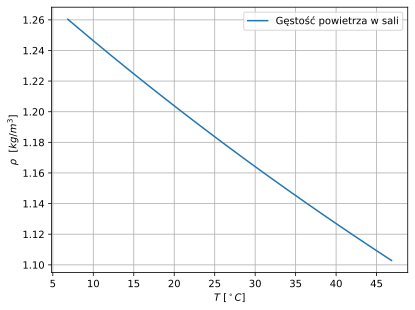

In [53]:
plt.plot(
    T:=np.linspace(280, 320, 100) * si.K, 
    rho(p=1013*si.hPa, T=T, Rd=Rd).to_base_units(),
    label='Gęstość powietrza w sali'
    )
plt.xlabel(r"$T$ [${}^\circ C$]")
plt.ylabel(r"$\rho$  [$kg/m^3$]")
plt.gca().xaxis.set_units(si.celsius)
plt.legend()
plt.grid(True)
show_plot("fig1_gestosc")